# Leakage Detection Model using Multi Layer Perceptron Algorithm

In [2]:
#Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from pickle import dump
from keras.models import model_from_json
from pickle import load

import susi
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

#### Leakage Data

In [3]:
#reading the leakage data
df_leak=pd.read_csv('leak_values_random.csv',header=None)
#data shape
df_leak.shape

(10000, 16)

In [4]:
df_leak.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,2,0,0,0,0,0,3,0,0,0,0,4,0,0,0
1,0,4,0,0,0,0,0,0,0,8,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0
3,0,8,0,0,0,6,0,3,10,0,0,5,0,0,0,0
4,0,0,0,0,0,3,0,0,0,0,0,0,0,0,7,0


#### Pressure Data

In [5]:
# reading the pressure data
df_pressure=pd.read_csv('pressure_response_random.csv',header=None)
# Data Shape
print(df_pressure.shape)

df_pressure.head()

(10000, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.027035,0.051872,0.067543,0.039513,0.031929,0.012375,0.028687,0.043064,0.052933,0.058994,0.073780,0.107937,0.152534,0.101807,0.091793,0.056034
1,0.045982,0.089344,0.117271,0.066940,0.054207,0.021233,0.048775,0.072491,0.087807,0.092964,0.133488,0.087234,0.080238,0.070751,0.064766,0.091915
2,0.011093,0.016731,0.020470,0.016373,0.013245,0.004726,0.011810,0.018921,0.025459,0.027477,0.051662,0.130043,0.144535,0.207073,0.144440,0.028271
3,0.122879,0.233437,0.317451,0.178909,0.144608,0.056400,0.130341,0.194996,0.224495,0.236866,0.224968,0.222637,0.264748,0.200520,0.182701,0.213291
4,0.023178,0.033390,0.038452,0.033859,0.027527,0.010220,0.024635,0.039394,0.046700,0.045845,0.063839,0.123375,0.132126,0.144451,0.152092,0.045437


In [5]:
#15 pressure values
#df_pressure1=df_pressure.drop([7,12],axis=1)
#df_pressure1.head()

## Model Building

In [6]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras import backend
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LeakyReLU

In [7]:
#df_pressure=df_pressure[:1000]
#df_leak=df_leak[:1000]

In [7]:
#Changing pandas dataframe to numpy array
X = df_pressure.values
y = df_leak.values

In [8]:
#splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle = False)

### Data preprocess

In [9]:
scaler_x = MinMaxScaler()
scaler_x.fit(X_train)
NX_train = scaler_x.transform(X_train)
dump(scaler_x, open('scaler_x.pkl', 'wb'))

In [10]:
scaler_y = MinMaxScaler()
scaler_y.fit(y_train)
Ny_train = scaler_y.transform(y_train)
dump(scaler_y, open('scaler_y.pkl', 'wb'))

In [11]:
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=16))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.05))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                

In [12]:
#Neural network
model = Sequential()
model.add(Dense(16, input_dim=16,activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
#model.summary()

In [13]:
%%time
#model traininig
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=8,  verbose=2, validation_split=0.2)


Epoch 1/1000


800/800 - 4s - loss: 5.9583 - mse: 5.9583 - val_loss: 5.7662 - val_mse: 5.7662 - 4s/epoch - 5ms/step
Epoch 2/1000
800/800 - 3s - loss: 5.9180 - mse: 5.9180 - val_loss: 5.7628 - val_mse: 5.7628 - 3s/epoch - 3ms/step
Epoch 3/1000
800/800 - 2s - loss: 5.9162 - mse: 5.9162 - val_loss: 5.7612 - val_mse: 5.7612 - 2s/epoch - 2ms/step
Epoch 4/1000
800/800 - 2s - loss: 5.9156 - mse: 5.9156 - val_loss: 5.7608 - val_mse: 5.7608 - 2s/epoch - 3ms/step
Epoch 5/1000
800/800 - 2s - loss: 5.9152 - mse: 5.9152 - val_loss: 5.7609 - val_mse: 5.7609 - 2s/epoch - 2ms/step
Epoch 6/1000
800/800 - 1s - loss: 5.9153 - mse: 5.9153 - val_loss: 5.7606 - val_mse: 5.7606 - 1s/epoch - 1ms/step
Epoch 7/1000
800/800 - 1s - loss: 5.9152 - mse: 5.9152 - val_loss: 5.7605 - val_mse: 5.7605 - 1s/epoch - 1ms/step
Epoch 8/1000
800/800 - 1s - loss: 5.9148 - mse: 5.9148 - val_loss: 5.7609 - val_mse: 5.7609 - 1s/epoch - 1ms/step
Epoch 9/1000
800/800 - 1s - loss: 5.9149 - mse: 5.9149 - val_loss: 5.7605 - val_mse: 

In [14]:

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


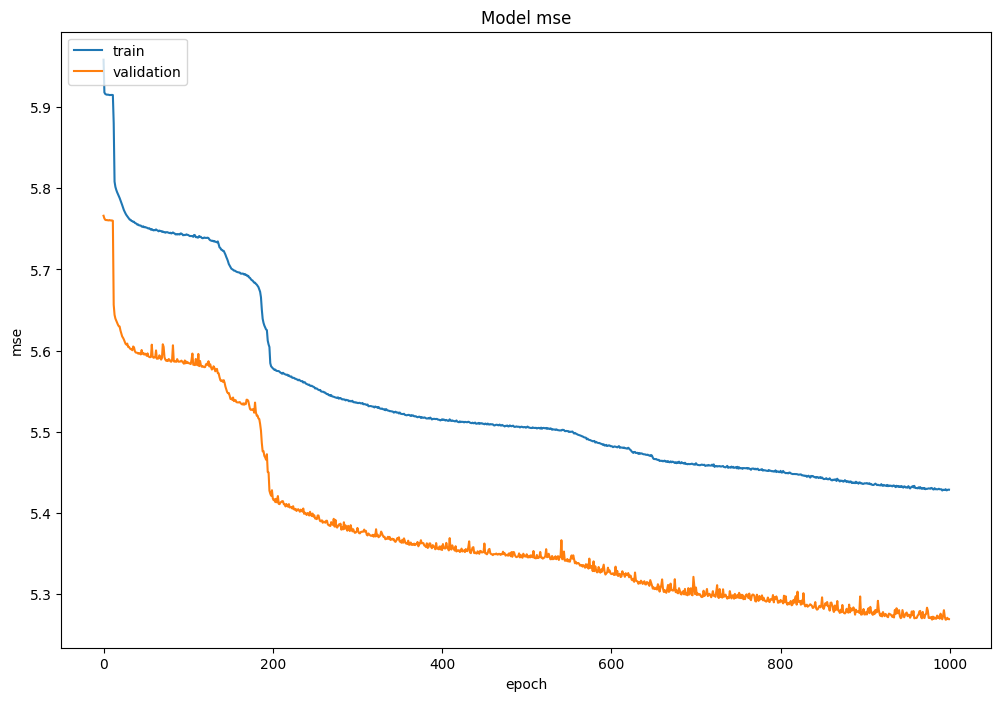

In [15]:
# summarize history for rmse
fig, axes = plt.subplots(figsize=(12, 8))
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
fig.savefig('mse_leakyrelu_org.png')

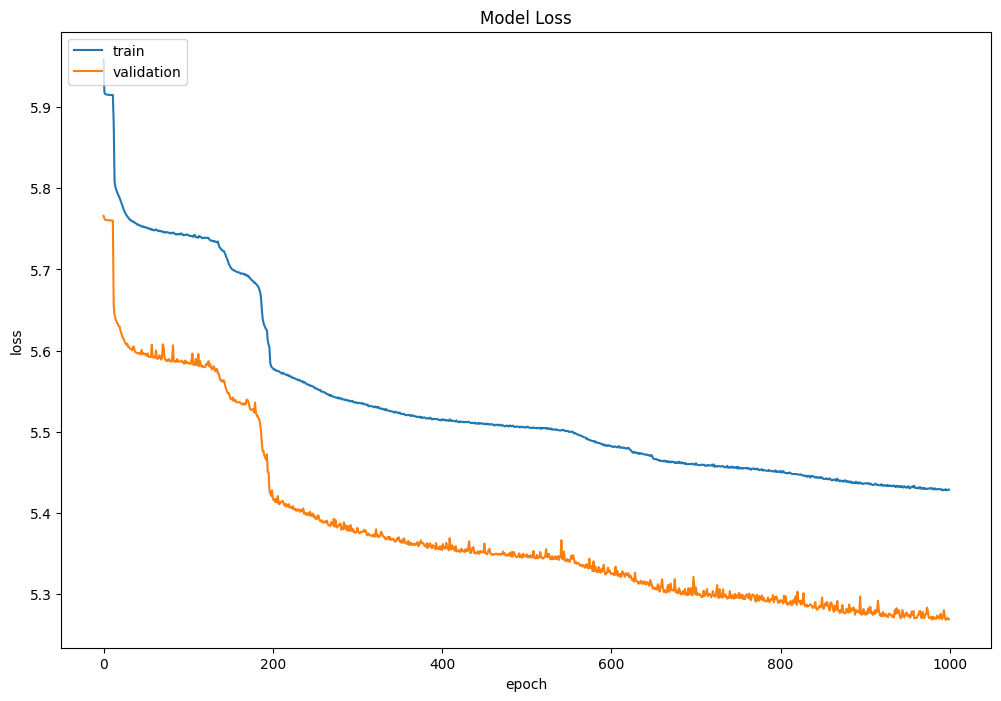

In [16]:
fig, axes = plt.subplots(figsize=(12, 8))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [17]:
#save the model
# serialize model to JSON
model_json = model.to_json()
with open("model_sigmoid.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_sigmoid.h5")
print("Saved model to disk")

Saved model to disk


## Testing

In [18]:
# load json and create model
json_file = open('model_sigmoid.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_sigmoid.h5")
print("Loaded model from disk")

Loaded model from disk


In [19]:
loaded_scaler_x = load(open('scaler_x.pkl', 'rb'))
X_test = loaded_scaler_x.transform(X_test)


In [20]:
loaded_scaler_y = load(open('scaler_y.pkl', 'rb'))

In [21]:
y_test_t = loaded_scaler_y.transform(y_test)

In [22]:
#prediction
y_pred = loaded_model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [23]:
y_pred_inverse = loaded_scaler_y.inverse_transform(y_pred)

In [24]:
from sklearn.metrics import mean_absolute_error
from math import sqrt

#calculate rmse
def mae_test(y_True,y_Pred):
    len_y=len(y_True)
    sum_val=0
    for i , j in zip(y_True,y_Pred):
        val=abs(i-j)
        sum_val+=val
    err=sum_val/len_y
    #err=mean_absolute_error(y_true, y_pred)
    return err

In [25]:
mae_list=[]
for i , j in zip(y_pred,y_test_t):
    val=mae_test(j,i)
    mae_list.append(val)   
print('Mae for test data is {}'.format(np.mean(mae_list)))

Mae for test data is 0.3683055108983142


<hr>

## Result Display of Nodes

In [26]:
acc_list=[]
threshold=[.1,.2,.3,.4,.5,.6,.7,.8,.9]
for l in threshold:
    
    Ypred_maxarg_list=[]
    Ytest_maxarg_list = []
    sum_acc=0
    for i , j in zip(y_pred,y_test_t):
        val1= [1 if n > l else 0 for n in i]
        val2=[1 if m > l else 0 for m in j]
        val3=len([1 for p, q in zip(val1, val2) if p == q])
        sum_acc=sum_acc+val3

        Ypred_maxarg_list.append(val1)
        Ytest_maxarg_list.append(val2)
    acc=sum_acc/(16*len(y_test))
    acc_list.append(acc)
    print("Accuracy is {} %".format(acc)) 

Accuracy is 0.59140625 %
Accuracy is 0.60140625 %
Accuracy is 0.6065 %
Accuracy is 0.61871875 %
Accuracy is 0.6283125 %
Accuracy is 0.634875 %
Accuracy is 0.6463125 %
Accuracy is 0.6653125 %
Accuracy is 0.68390625 %


In [27]:
acc=sum_acc/(16*len(y_test))
print("Accuracy is {} %".format(acc)) 

Accuracy is 0.68390625 %


In [28]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report
y_true_matrix = np.array(Ytest_maxarg_list)
y_pred_matrix = np.array(Ypred_maxarg_list)
matrix=multilabel_confusion_matrix(y_true_matrix, y_pred_matrix)

In [29]:
print(matrix)
print(classification_report(y_true_matrix,y_pred_matrix))

[[[1985    4]
  [   8    3]]

 [[1849  120]
  [  27    4]]

 [[1365  616]
  [  14    5]]

 [[   0 1977]
  [   0   23]]

 [[1142  837]
  [   9   12]]

 [[ 356 1624]
  [   0   20]]

 [[ 226 1751]
  [   4   19]]

 [[1573  406]
  [  21    0]]

 [[1847  135]
  [  17    1]]

 [[1860  119]
  [  14    7]]

 [[1954   29]
  [  17    0]]

 [[1901   85]
  [  10    4]]

 [[1930   49]
  [  15    6]]

 [[ 981 1002]
  [   6   11]]

 [[ 869 1107]
  [   6   18]]

 [[1914   76]
  [  10    0]]]
              precision    recall  f1-score   support

           0       0.43      0.27      0.33        11
           1       0.03      0.13      0.05        31
           2       0.01      0.26      0.02        19
           3       0.01      1.00      0.02        23
           4       0.01      0.57      0.03        21
           5       0.01      1.00      0.02        20
           6       0.01      0.83      0.02        23
           7       0.00      0.00      0.00        21
           8       0.01      0.06

c:\Users\vishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


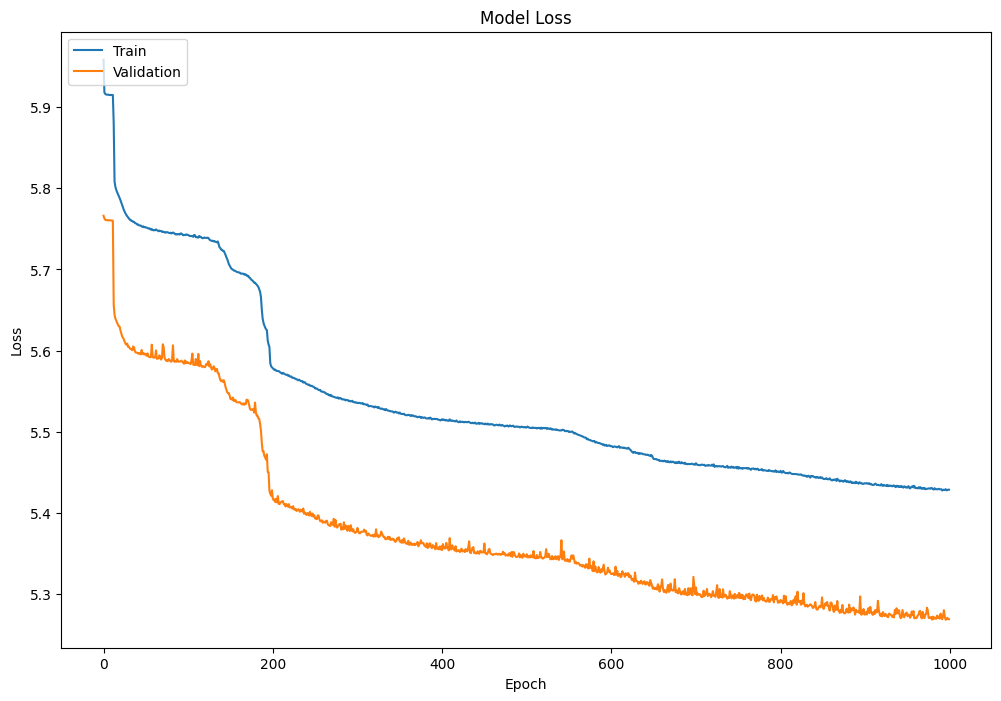

In [37]:
# Plot training loss and validation loss over epochs
fig, axes = plt.subplots(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


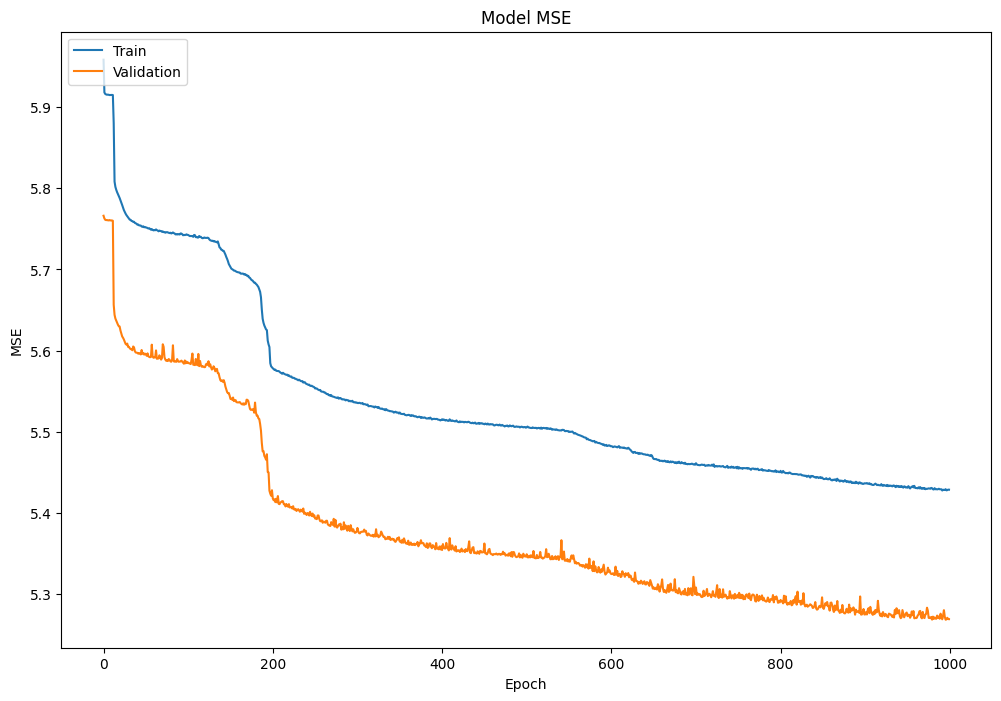

In [38]:
# Plot training MSE and validation MSE over epochs
fig, axes = plt.subplots(figsize=(12, 8))
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


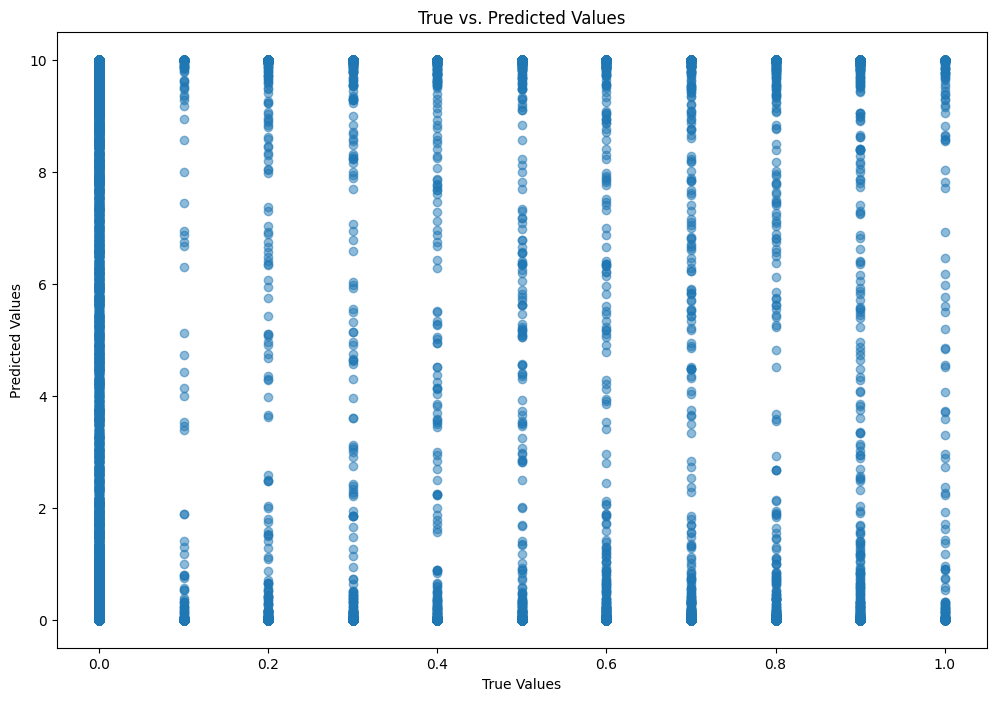

In [39]:
# Scatter plot of true vs. predicted values for the test set
fig, axes = plt.subplots(figsize=(12, 8))
plt.scatter(y_test_t, y_pred_inverse, alpha=0.5)
plt.title('True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


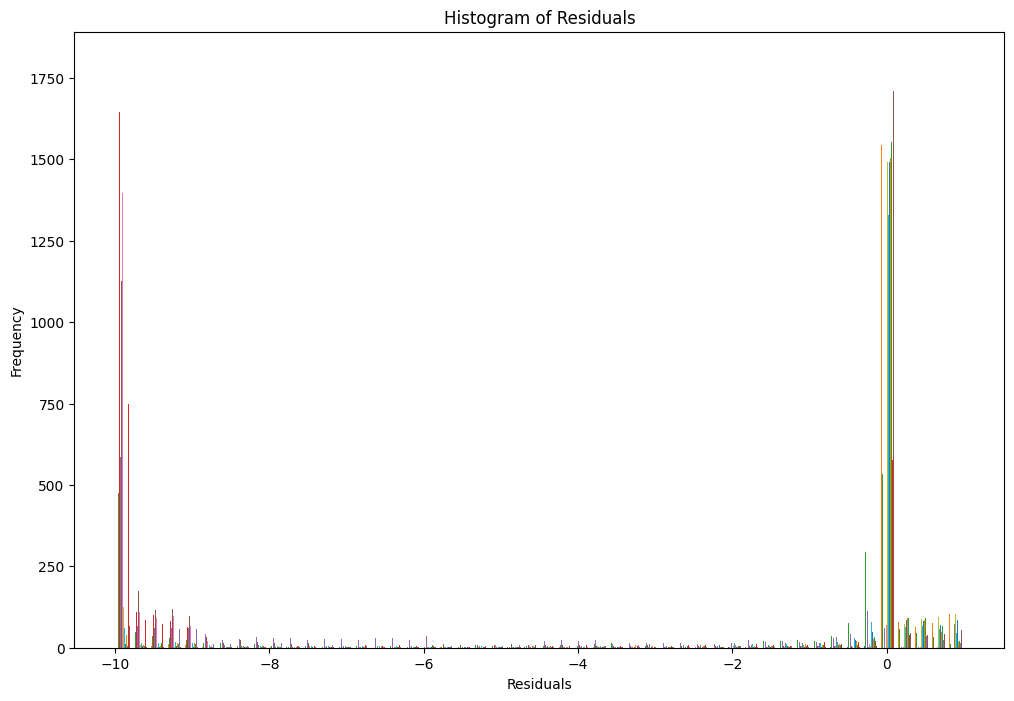

In [40]:
# Histogram of residuals
residuals = y_test_t - y_pred_inverse
fig, axes = plt.subplots(figsize=(12, 8))
plt.hist(residuals, bins=50)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


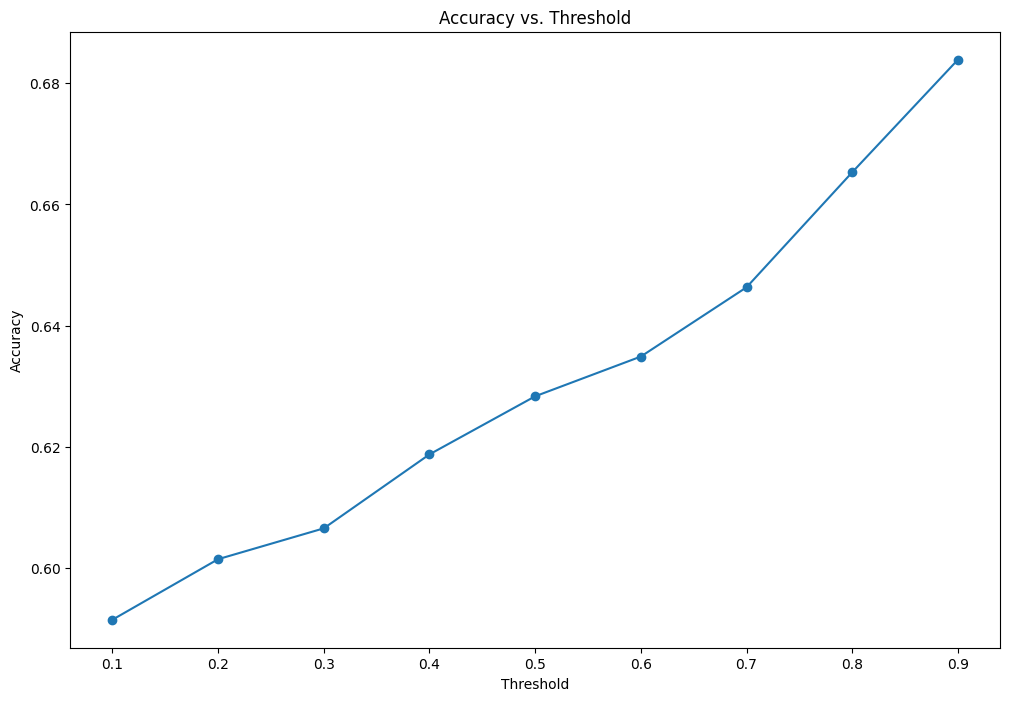

In [41]:
# Plot accuracy vs. threshold
fig, axes = plt.subplots(figsize=(12, 8))
plt.plot(threshold, acc_list, marker='o')
plt.title('Accuracy vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()


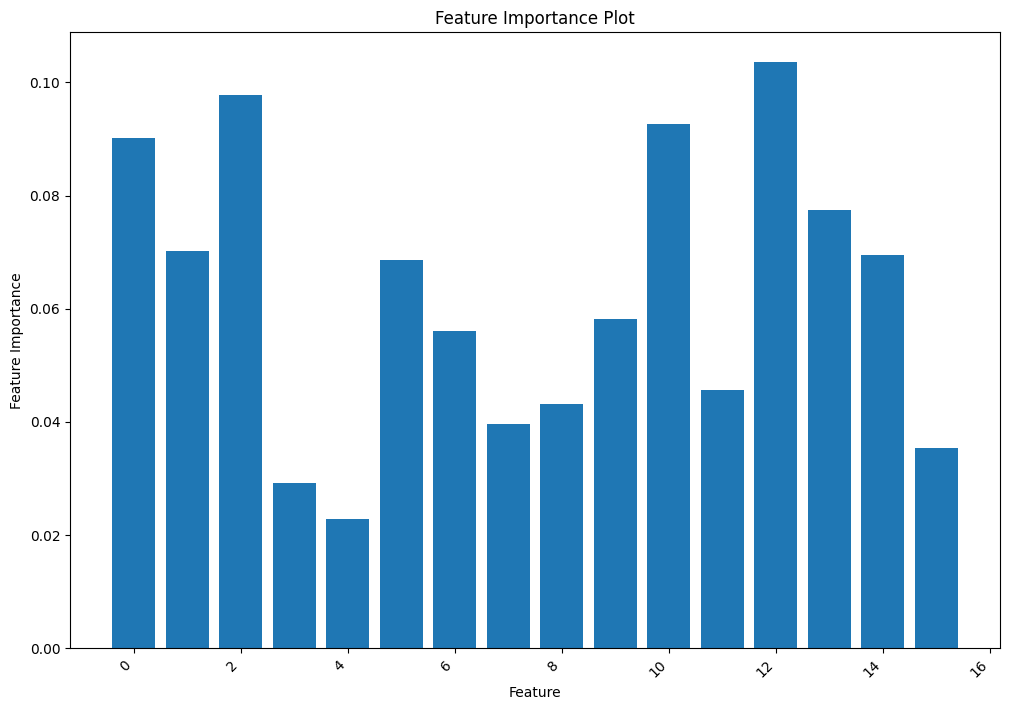

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor  # Assuming you used RandomForestRegressor

# Your existing code for loading data
df_pressure = pd.read_csv('pressure_response_random.csv', header=None)
X = df_pressure.values

# Assuming you have a RandomForestRegressor model (replace this with your actual model)
model = RandomForestRegressor()
model.fit(X, y)

feature_importance = model.feature_importances_
features = df_pressure.columns  # Use column names as feature names

fig, axes = plt.subplots(figsize=(12, 8))
plt.bar(features, feature_importance)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [46]:
feature_names = df_pressure.columns
print(feature_names)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')


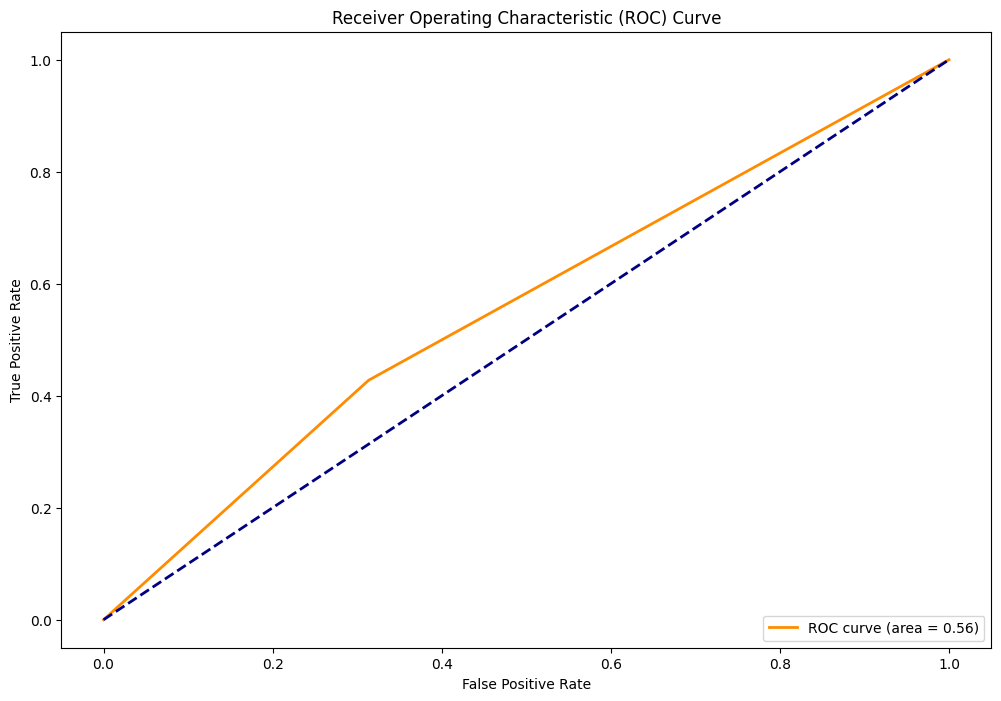

In [47]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_true_matrix.ravel(), y_pred_matrix.ravel())
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(figsize=(12, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
